# Project 1: Investigate a Dataset on Medical Appointment No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> **Some questions i would like to find out about the dataset are:**

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment or not?

2. How does the factors contribute?

3. what are the percentage of people who didnt show up and those who showed up?

In [56]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [57]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#lets print out the first five columns
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
# lets look at the number of rows and columns
df.shape

(110527, 14)

> This signifies that we have **110, 527 rows** and **14 columns** in the dataset

In [59]:
#> Lets check for more info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> From the previous code we could observe that:

1. There are no null values in the dataset (tentatively)
2. The dates are still in string format so we have to change it to a datetime column
3. 110,527 rows and 14 columns also confirmed here

> **What does each column means:**

1. Patientid - identification number of each patient

2. AppointmentID - Identification number of each appointment

3. Gender - Male or Female

4. DataMarcacaoConsulta - The day of the actual appointment

5. DataAgendamento - The day someone called or registered the appointment, this is before appointment 

6. Age - How old the patient is

7. Neighbourhood - Where the appointment take place

8. Scholarship - True or false

9. Hipertension - True or false

10. Diabetes - True or false

11. Alcoholism - True or false

12. handcap - True or false

13. SMS_recieved - 1 or more messages sent to the patient

14. No_show - True or false

In [60]:
# Lets check for null values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

> The code above confirm that there are no null values in our dataset

In [61]:
# lets check for the description of the dataset to get more insight
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **From the code above we can deduce that:**

1. Observed that the age minimum value of -1, this might be due to input error so we are going to remove roles having less than 0

2. The majority of people that will be analysed fall between 18 to 55 years old

3. On the basis of having scholarship, we found out that majority didnt have scholarship

4. on the basis of the illness(Hipertension, Diabetes, Alcoholism, Handcap), we can deduce that mmajority were not having the illness

In [62]:
# Lets check for duplicated values
df.duplicated().any()

False

> The code above shows that there are no duplicated row in the dataset

In [63]:
#Checking for the unique vales
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> From the code above, we can deduce that:

1. The AppointmentID is just a series of different values through out the dataset, it has less importance so we are going to remove the column
2. The number of unique values in the patientid shows that some patients seek for medical appointment more than once

> **From this aspect we encounter some problems and the solution include:**

1. to convert the two date columns which is stated to be string to a datetime columns

2. to create a new feature that finds the differnce between the two dates

### Data Cleaning

In [64]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### Coverting the date columns to datetime for better analysis

In [65]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Removing the appointment ID column

In [66]:
df.drop("AppointmentID", axis =1, inplace = True )

In [67]:
#checking if the column has been dropped
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Finding the interval between the appointmentday and the scheduleday in hour

In [68]:
df[['ScheduledDay', 'AppointmentDay']].describe()

<ipython-input-68-e668c8370923>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['ScheduledDay', 'AppointmentDay']].describe()
<ipython-input-68-e668c8370923>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['ScheduledDay', 'AppointmentDay']].describe()


,ScheduledDay,AppointmentDay
count,110527,110527
unique,103549,27
top,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00
freq,24,4692
first,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00
last,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00


> **from the code above we could deduce that**

1. The schedule day span through 10th november, 2015 - 8th of june, 2016

2. The Appointment day span between 29th of April, 2016 - 8th of june, 2016

3. the appointment day does not have a time attached to it

In [69]:
# Let's capture the date in each datetime column and check for the number of unique values
display('The number of unique value in the schduled day is : {}'.format(df['ScheduledDay'].dt.date.nunique()))
display('The number of unique value in the apointment day is : {}'.format(df['AppointmentDay'].dt.date.nunique()))

'The number of unique value in the schduled day is : 111'

'The number of unique value in the apointment day is : 27'

> Our number of unique values are justified because the days found during the appointment period is shorter to the scheduled period

#### Exploring the datetime columns

In [70]:
df['ScheduledDay'].dt.date.value_counts()

2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-03-05       1
2016-01-27       1
2016-03-19       1
2015-11-10       1
2015-12-03       1
Name: ScheduledDay, Length: 111, dtype: int64

Text(0, 0.5, 'count')

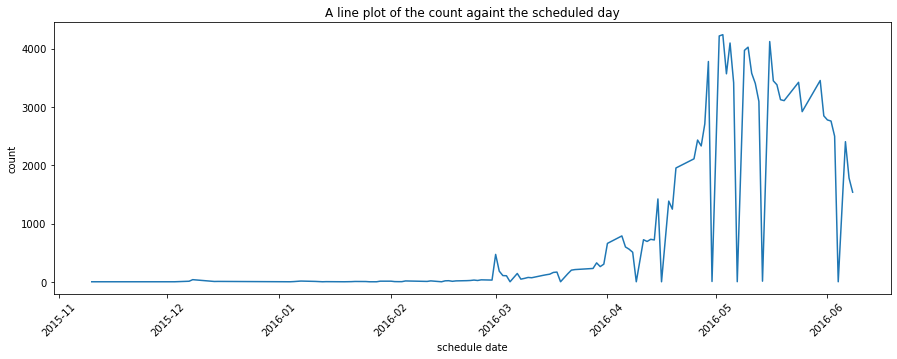

In [71]:
df['ScheduledDay'].dt.date.value_counts().plot( kind = 'line', figsize = (15,5))
plt.title('A line plot of the count againt the scheduled day')
plt.xlabel('schedule date')
plt.xticks(rotation = 45)
plt.ylabel('count')

> from the visuals above, we can deduce that the we have more schedule time between april to june

Text(0, 0.5, 'count')

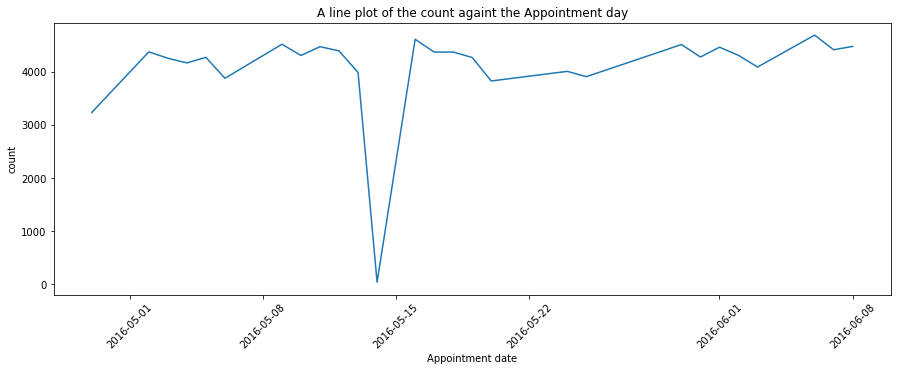

In [72]:
df['AppointmentDay'].dt.date.value_counts().plot(kind = 'line', figsize = (15,5))
plt.title('A line plot of the count againt the Appointment day')
plt.xlabel('Appointment date')
plt.xticks(rotation = 45)
plt.ylabel('count')

#### Removing age values having negative values

In [73]:
#checking roles with the neagtive age
df.query('Age < 0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


> From the code above we could deduce that there is only one entry with error so we will go ahead to drop the role

In [74]:
df.drop(df[df['Age'] < 0].index, axis =0, inplace = True)

In [75]:
# checking again to confirm 
df.query('Age < 0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> the code above shows that we have successfully removed the column

#### converting the No-show column into int

In [76]:
#df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'No' else 1)

In [77]:
df.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the percentage of people who showed up and those who didnt!)

In [78]:
display('The percentage of people who showed up : {}'.format((len(df[df['No-show'] == 'No']) / len(df)) *100 ))
display("The percentage of people who didn't show up : {}".format((len(df[df['No-show'] == 'Yes']) / len(df)) *100 ))

'The percentage of people who showed up : 79.80656135208005'

"The percentage of people who didn't show up : 20.193438647919944"

1. The code above shows that about **80%** of the patient showed up for the appointment.

2. While approximately **20%** of patient didnt showed up for the appointment

In [79]:
#creating a countplot function to avoid repitition
def countplot(df, var):
    plt.figure(figsize=[15,7])
    sns.countplot(data =df, x= var)
    plt.title(f'''A countplot showing number of patients against {var}'''.title(), weight='bold')
    plt.xlabel(var.title())
    plt.ylabel('Number of patients'.title())

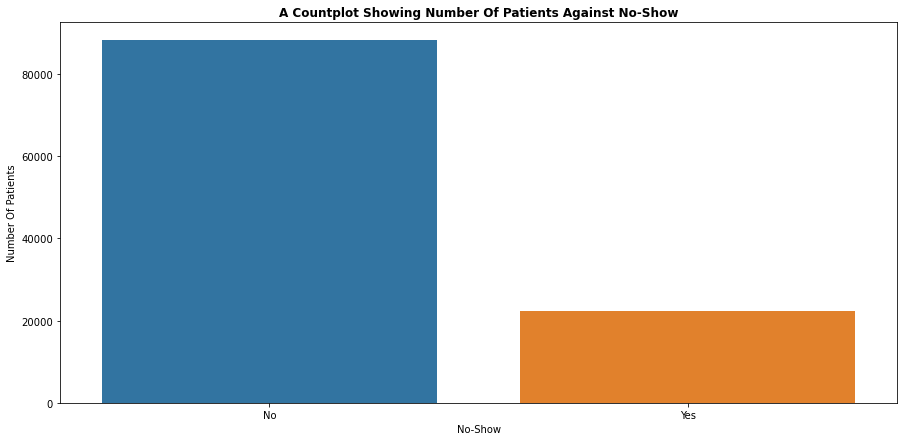

In [80]:
countplot(df, 'No-show')

In [81]:
#sns.countplot('No-show', data =df)
#plt.title("A countplot showing the number of patient who showed to the number of people who didn't")
#plt.xlabel('showed or Not')
#plt.ylabel('Number of patients')
#plt.show()

> From the code above we can deduce that the number of people who showed up is about 4 times the people who didn't show up

### Research Question 2  (How does the gender affect wether the patient will show or not!)

In [82]:
#sns.countplot('Gender', data = df)
#plt.title('Total number of female to male')
#plt.ylabel('Number of patient')
#plt.show()

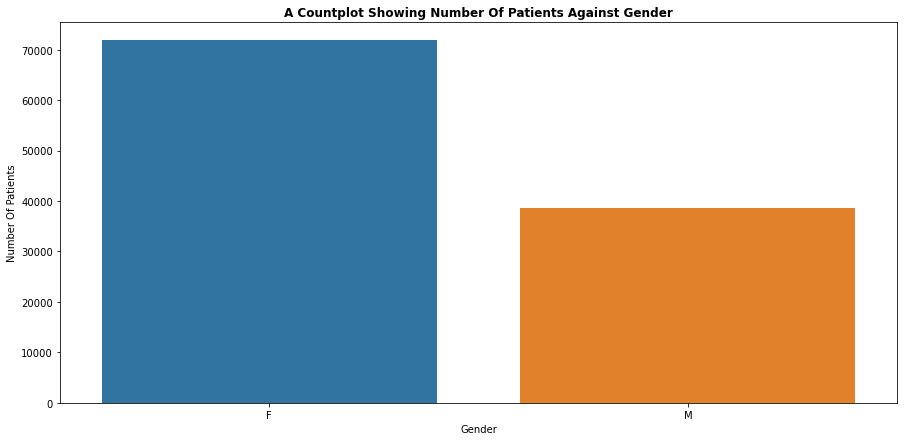

In [83]:
countplot(df, 'Gender')

> The code above signifies that the number of females that reqires medical attention is more than the males

C:\Users\Up\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'A countplot comparing gender and whether a patient show or not')

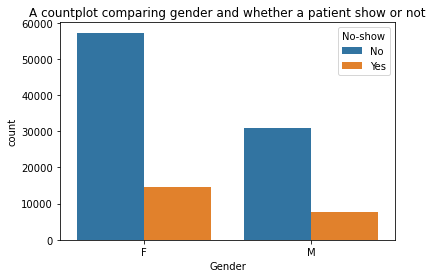

In [84]:
sns.countplot('Gender', hue = 'No-show', data=df)
plt.title('A countplot comparing gender and whether a patient show or not')

From the plot above it shows that the propoortion of the male anf female showing for the appointment or not is almost the same so no significant information can be gotten from the gender alone.      

### Research Question 3  (How does the age affect wether the patient will show or not!)

In [85]:
miss = df['No-show'] == 'Yes'
show = df['No-show'] == 'No'

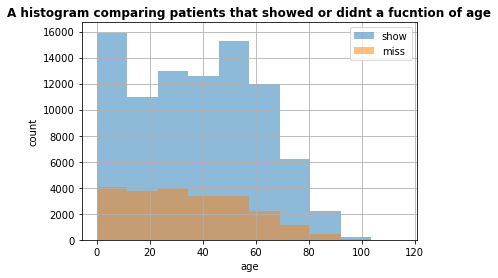

In [86]:
df[show].Age.hist(alpha = .5, label='show')
df[miss].Age.hist(alpha = .5, label = 'miss')
plt.title('A histogram comparing patients that showed or didnt a fucntion of age', weight='bold')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

**from the histogram above, we can deduce that:**

1. Patients from around age 0 to like around 40 are more likely to miss medical appointment

2. old patients around 60 and above are more likely to show up for medical appointment

### Research Question 4  (Does sms recieve have effect on the patient showing or not!)

In [87]:
#sns.countplot('SMS_received', data = df)
#plt.title('A count plot of sms received')

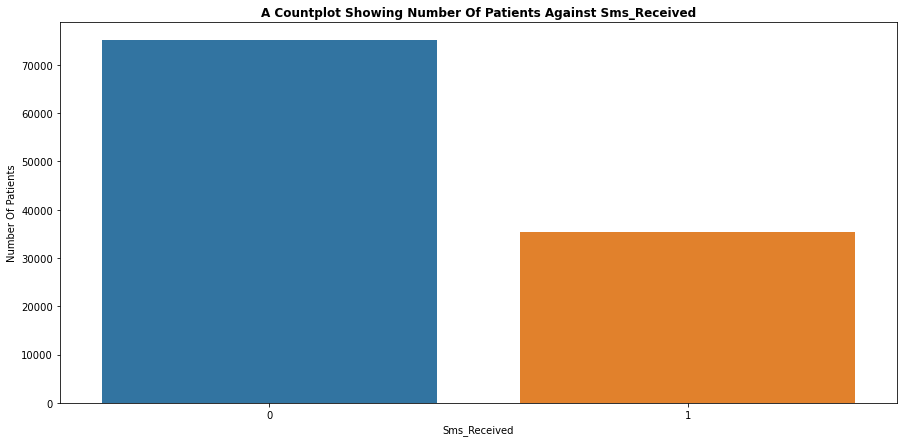

In [88]:
countplot(df, 'SMS_received')

the plot above above shows that most patients didn't recieve SMS

Text(0.5, 1.0, 'A bar plot comparing sms recieve and No show and number of patients')

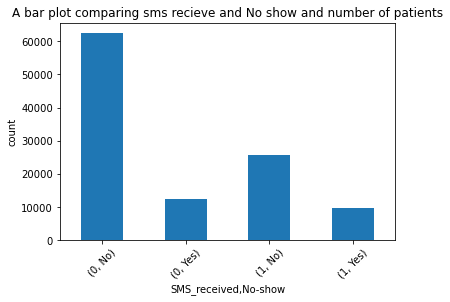

In [89]:
df.groupby('SMS_received')['No-show'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('count')
plt.title('A bar plot comparing sms recieve and No show and number of patients')

from the plot above we could deduce that patients that recieve sms didn't show an higher chance of showing up for the medical appointment

### Research Question 5  (How does the diseases affect whether a patient showed up or not!)

In [96]:
#Checking the head of the dataset to get the disease features
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [91]:
#creating a countplot function to avoid repitition with  the hue 
def countplot(df, var, no_show):
    plt.figure(figsize=[15,7])
    sns.countplot(data =df, x= var, hue=no_show)
    plt.title(f'''A countplot showing number of patients against {var}'''.title(), weight='bold')
    plt.xlabel(var.title())
    plt.ylabel('Number of patients'.title())

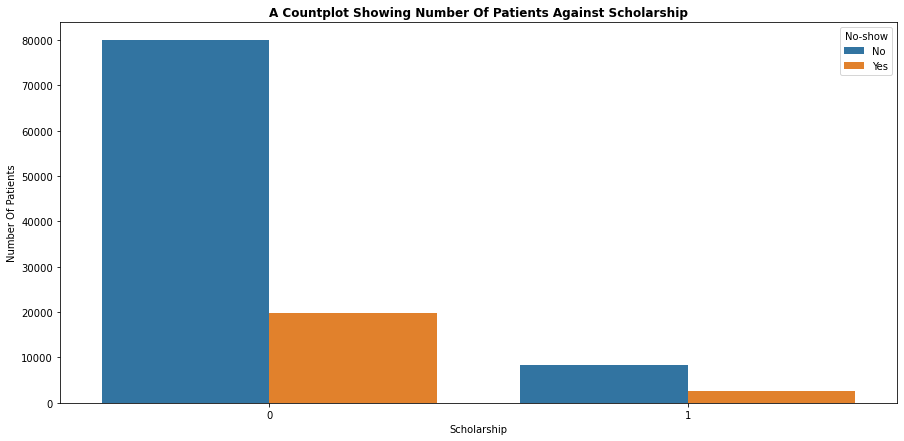

In [92]:
countplot(df, 'Scholarship', 'No-show')

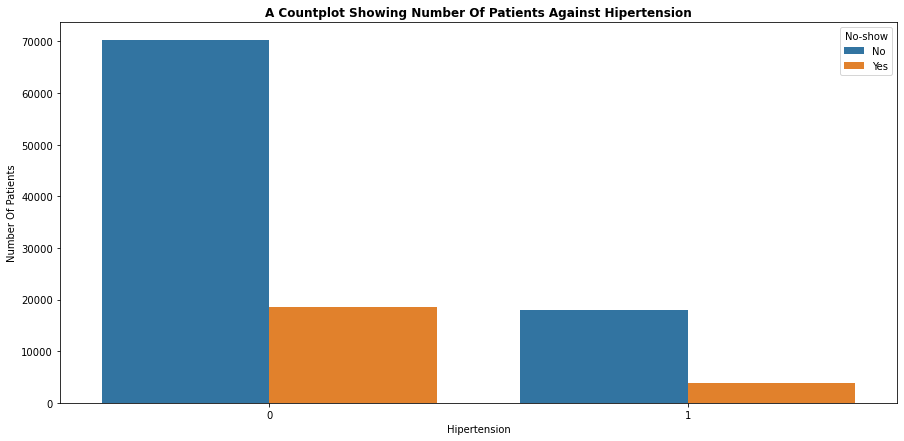

In [93]:
countplot(df, 'Hipertension', 'No-show')

> From the plot above, We can deduce that patients not having hipertension are more than patients having hipertension

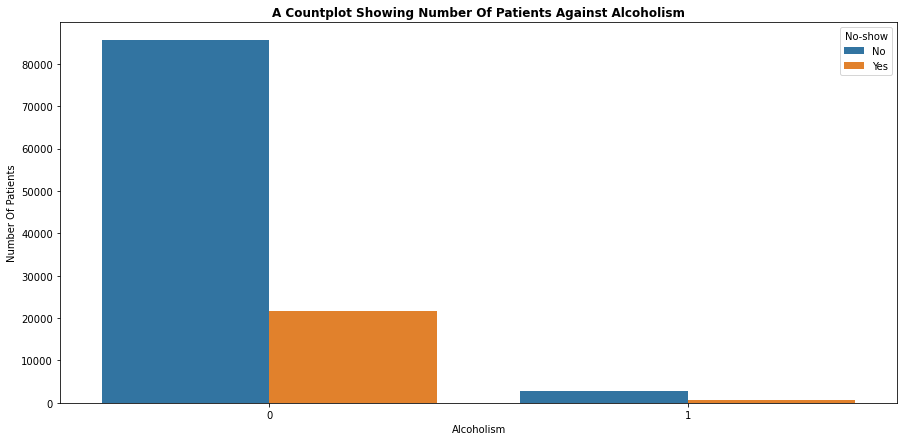

In [94]:
countplot(df, 'Alcoholism', 'No-show')

> From the plot above , patients that are not alcoholic are more than those acoholic

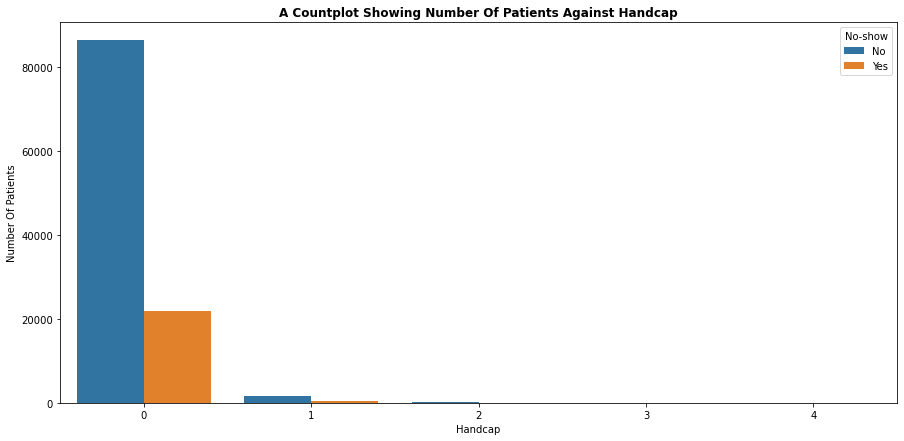

In [95]:
countplot(df,'Handcap', 'No-show')

> From the plot above, majority of the patients are not handicap and most didnt show up for the appointment.

>Only few are 3 or more handicap

<a id='conclusions'></a>
## Conclusions

**Question** : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment or not?

1. SMS_recieved
2. age
3. patients that recieve sms didn't show an higher chance of showing up for the medical appointment
4. **80%** of the patient showed up for the appointment while approximately **20%** of patient didnt showed up for the appointment

#### Limitations:

1. Dataset didn't explain why the patient comes to the doctor as that can provide more insight in why patient showed up or didn,t

2. The dataset was collected for a short period which doesnt make the data reliable enough to make strong decision